<a href="https://colab.research.google.com/github/singhradhika236/playstore-app-review/blob/main/Copy_of_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression - Supervised Learning - Classification 
- Predicting the CLASS of the predictor column (Y variable)
- Y variable would be categorical & Binary (True or False, Yes or No, 1 or 0, Red or not Red, Gone & Not Gone,...)
- How could we use the LINEAR EQUATION to CLASSIFY a Y variable instead of predicting Y variable
- What is the LOSS function for Gradient Descent Algo for Logistic Regression. DONE
- Logit function, Odds ratio, Logarithms, Probabilities - DONE
- We build basic Logistic Regression Model - 
- Evaluation metrics of Logistic Regressions - Confusion Matrix


Airtel users - Churn Analysis
x1 -> Monthly expenses
x2 -> Tenure 
x3 -> No of complaints
Y -> Churn -> 1 or True or WIHTUS is still with Airtel, 0 or False or NOTWITHUS moved off Airtel

x1  x2  x3  y   y^  y-    prob(y-)
350  8   6  1   1   340   0.78
250  4   10 0   0   230   0.45
400  12  3  1   0   467   0.35
230  15  2  0   1   435   0.89  
500  32  3  0   1   657   0.76
420  56  2  1   0   756   0.32
350  9   5  1   0   654   0.25

You are predicting the probabilities of TRUE (1) in the LOGISTIC REGRESSION. Any thing with is not True is considered as False

y- = w0 + w1x1 + w2x2 + w3x3

y- = loge(p/1-p)

loge(p/1-p) = w0 + w1x1 + w2x2 + w3x3

p = Probability of predicting 1 as 1
1 - p = Probability of Predicting 0 as 0

p/1-p is called odds ratio

loge(p/1-p) = SUM(wixi) = wTx

p/1-p = e**wTx
p = (1-p) e**wTx
p = e**wTx -p*e**wTx

p + p*e**wTx = e**wTx
p(1+e**wTx) = e**wTx
p(1/e**wTx + e**wTx/e**wTx) = e**wTx/e**wTx
p(1+e**(-)wTx) = 1

p = 1/1+e**(-)wTx


# <b> <u>Introduction: What is Logistic Regression? </u></b>

### Logistic regression is a classification algorithm that predicts the probability of an outcome that can only have two values (i.e. a dichotomy). A logistic regression produces a logistic curve, which is limited to values between 0 and 1. Logistic regression models the probability that each input belongs to a particular category.

### **Logistic regression** is an excellent tool to know for classification problems, which are problems where the output value that we wish to predict only takes on only a small number of discrete values. Here we'll focus on the binary classification problem, where the output can take on only two distinct classes.

### In **Logistic Regression**, the log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

### \begin{align*}
    \log \left({p\over 1-p}\right) &= w_0 + w_1x_1, ..., w_jx_j \nonumber \\
    &= w^Tx \nonumber
\end{align*}

### where:

- ### $w_{0}$ is the intercept term, and $w_1$ to $w_j$ represents the parameters for all the other features (a total of j features).
- ### By convention of we can assume that $x_0 = 1$, so that we can re-write the whole thing using the matrix notation $w^Tx$.

### This is called the **logit function**. The equation can be re-arranged into the **logistic function**:

### $$p = \frac{e^{w^Tx}} {1 + e^{w^Tx}}$$

### Or in the more commonly seen form:

### $$h_w(x) = \frac{1}{ 1 + e^{-w^Tx} }$$ 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline

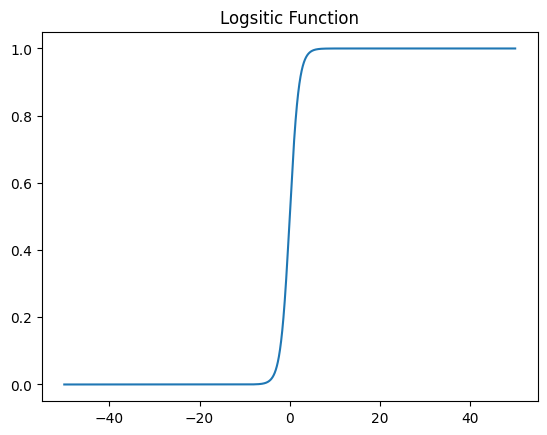

In [ ]:
x_values = np.linspace(-50, 50, 100000) # wTx values
y_values = [1 / (1 + np.exp(-x)) for x in x_values]
# 1/1+e**-WTx
# X = 100 recrods
# 100 different WTx values

plt.plot(x_values, y_values)
plt.title('Logsitic Function')
plt.show()

# Sigmoid function
# Logistic function
# Threshold for you is 0.5 by default

### The **logistic function** has some nice properties. The y-value represents the probability and it is always bounded between 0 and 1, which is want we wanted for probabilities. For an x value of 0 you get a 0.5 probability. Also as you get more positive x value you get a higher probability, on the other hand, a more negative x value results in a lower probability.

# <b><u> Defining the cost function for Logistic Regression </b>

Linear Regression - Gradient Descent - Loss Function = MSE

RMSE = SQRT(SUM(yi-yi^)**2)/NumberofRecords

Using the above loss function, gradient descent algorith was searching for the best coefficient values

How is it different for Logistic Regression?

y^ = 1/1+e**-WTx

Loss function of Gradient Descent for Logistic Regression = Error in Classifying 1's + Error in Classifying 0's


### When utilizing logistic regression, we are trying to learn the $w$ values in order to maximize the probability of correctly classifying our glasses. Let's say someone did give us some $w$ values of the logistic regression model, how would we determine if they were good values or not? What we would hope is that for the household of class 1, the probability values are close to 1 and for the household of class 0 the probability is close to 0.

### But we don't care about getting the correct probability for just one observation, we want to correctly classify all our observations. If we assume our data are independent and identically distributed (think of it as all of them are treated equally), we can just take the product of all our individually calculated probabilities and that becomes the objective function we want to maximize. So in math:  

$$\prod_{class1}h_w(x)\prod_{class0}1 - h_w(x)$$ 

### The $\prod$ symbol means take the product of the $h_w(x)$ for the observations that are classified as that class. You will notice that for observations that are labeled as class 0, we are taking 1 minus the logistic function. That is because we are trying to find a value to maximize, and since observations that are labeled as class 0 should have a probability close to zero, 1 minus the probability should be close to 1. This procedure is also known as the **maximum likelihood estimation**.

### Next we will re-write the original cost function as:

### $$\ell(w) = \sum_{i=1}^{N}y_{i}log(h_w(x_{i})) + (1-y_{i})log(1-h_w(x_{i}))$$

### where:

- ### We define $y_{i}$ to be 1 when the $i_{th}$ observation is labeled class 1 and 0 when labeled as class 0, then we only compute $h_w(x_{i})$ for observations that are labeled class 1 and $1 - h_w(x_{i})$ for observations that are labeled class 0, which is still the same idea as the original function.
- ### Next we'll transform the original $h_w(x_{i})$ by taking the log. As we'll later see this logarithm transformation will make our cost function more convenient to work with, and because the logarithm is a monotonically increasing function, the logarithm of a function achieves its maximum value at the same points as the function itself. When we take the log, our product across all data points, it becomes a sum.
- ### The $N$ simply represents the total number of the data.

### Often times you'll also see the notation above be simplified in the form of a maximum likelihood estimator:

### $$ \ell(w) = \sum_{i=1}^{N} log \big( P( y_i \mid x_i, w ) \big) $$

### The equation above simply denotes the idea that , $\mathbf{w}$ represents the parameters we would like to estimate the parameters $w$ by maximizing conditional probability of $y_i$ given $x_i$.

### Now by definition of probability in the logistic regression model:
###  $h_w(x_{i}) = \frac{1}{1 + e^{-w^T x_i}}$ and $1- h_w(x_{i}) = \frac{e^{ -w^T x_i }} {1 + e^{ -w^T x_i } }$. 
 
### By substituting these expressions into our $\ell(w)$ equation and simplifying it further we can obtain  a simpler expression.

### $$
\begin{align}
\ell(w)
&= \sum_{i=1}^{N}y_{i}log(h_w(x_{i})) + (1-y_{i})log(1-h_w(x_{i})) \nonumber \\
&= \sum_{i=1}^{N} y_{i} log( \frac{1}{ 1 + e^{ -w^T x_i } } ) + ( 1 - y_{i} )
log( \frac{ e^{ -w^T x_i } }{ 1 + e^{ -w^T x_i } } ) \nonumber \\
&= \sum_{i=1}^{N} -y_{i} log( 1 + e^{ -w^T x_i } ) + ( 1 - y_{i} )
( -w^T x_i - log( 1 + e^{ -w^T x_i } ) ) \nonumber \\
&= \sum_{i=1}^{N} ( y_{i} - 1 ) ( w^T x_i ) - log( 1 + e^{ -w^T x_i } ) \nonumber
\end{align}
$$

# <b><u>Gradient Descent on Logistic Cost Function 

### Now that we obtain the formula to assess our algorithm, we'll dive into the meat of the algorithm, which is to derive the gradient for the formula (the derivative of the formula with respect to each coefficient):

### $$\ell(w) = \sum_{i=1}^{N} ( y_{i} - 1 ) ( w^T x_i ) - log( 1 + e^{ -w^T x_i } )$$

### And it turns out the derivative of log likelihood with respect to to a single coefficient $w_j$ is as follows (the form is the same for all coefficients):

### $$
\frac{\partial\ell(w)}{\partial w_j} = \sum_{i=1}^N (x_{ij})\left( y_i - \frac{1}{ 1 + e^{-w^Tx_i} } \right )
$$

### To compute it, you simply need the following two terms:

- ### $\left( y_i - \frac{1}{ 1 + e^{-w^Tx_i} } \right )$ is the vector containing the difference between the predicted probability and the original label.
- ### $x_{ij}$ is the vector containing the $j_{th}$ feature's value.

## <b>Updating model parameters using Gradient Descent 

### Recall our task is to find the optimal value for each individual weight to lower the cost. This requires taking the partial derivative of the cost/error function with respect to a single weight, and then running gradient descent for each individual weight to update them. Thus, for any individual weight $w_j$, we'll compute the following:

### $$ w_j^{(t + 1)} = w_j^{(t)} + \alpha * \sum_{s = i}^{i+B} \frac{\partial\ell_s(w)}{\partial w_j}$$ 

### where:

- ### $\alpha$ denotes the the learning rate or so called step size, in other places you'll see it denoted as $\eta$.
- ### $w_j^{(t)}$ denotes the weight of the $j_{th}$ feature at iteration $t$.

### And we'll do this iteratively for each weight, many times, until the whole network's cost function is minimized.

# <b> <u> Implementing Logistic Regression in Python </u></b>

### Let us now start implementing what we learned from the previous section into python codes. We will use the Telco Customer Churn data. 

## <b>What is Churn Prediction? </b> 

### Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.

## <b>About Data </b>

* ### customerID : Customer ID
* ### gender : Whether the customer is a male or a female
* ### SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
* ### Partner : Whether the customer has a partner or not (Yes, No)
* ### Dependents : Whether the customer has dependents or not (Yes, No)
* ### tenure : Number of months the customer has stayed with the company
* ### PhoneService : Whether the customer has a phone service or not (Yes, No)
* ### MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
* ### InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
* ### OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
* ### OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
* ### DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
* ### TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
* ### StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
* ### StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
* ### Contract : The contract term of the customer (Month-to-month, One year, Two year)
* ### PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
* ### PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* ### MonthlyCharges : The amount charged to the customer monthly
* ### TotalCharges : The total amount charged to the customer
* ### Churn : Whether the customer churned or not (Yes or No)

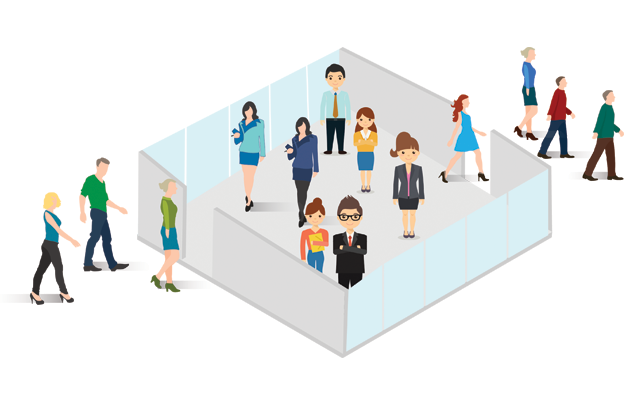

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
from google.colab import files
scores_file = files.upload()

Saving 8_WA_Fn_UseC_Telco_Customer_Churn.csv to 8_WA_Fn_UseC_Telco_Customer_Churn.csv


In [ ]:
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(scores_file['8_WA_Fn_UseC_Telco_Customer_Churn.csv']))
print(data.sample(10))

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
674   0823-HSCDJ    Male              1      No         No      52   
3876  7392-YYPYJ    Male              0      No         No      22   
4915  2436-QBZFP  Female              0     Yes        Yes      22   
5963  7163-OCEQI    Male              0     Yes        Yes      22   
3923  5275-SQEIZ    Male              0      No         No       1   
6984  6447-GORXK    Male              0      No        Yes      31   
5247  4971-PUYQO  Female              0      No         No      27   
25    6865-JZNKO  Female              0      No         No      30   
1098  9742-XOKTS    Male              0     Yes        Yes      67   
1605  7941-RCJOW    Male              0      No         No      65   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
674            No  No phone service             DSL                   No  ...   
3876          Yes               Yes     Fiber optic                

## **Dataset initialization**

In [ ]:
# data = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 3/Week 2/Day 2/WA_Fn-UseC_-Telco-Customer-Churn.csv")
# print("Dataset size")
# print("Rows {} Columns {}".format(data.shape[0], data.shape[1]))

Dataset size
Rows 7043 Columns 21


In [ ]:
print("Columns and data types")
pd.DataFrame(data.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df = data.copy()

### That's a lot of columns, to simplify our experiment we will only use 2 features **tenure** and **MonthlyCharges** and the target would be **Churn**  of course. Let us do a simple EDA and visualization on our features and target.

### EDA: Independent variables 



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

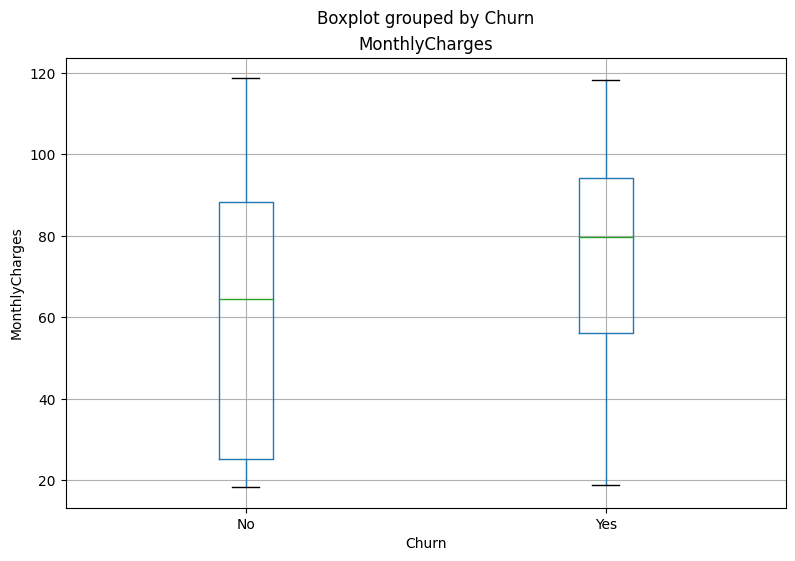

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'MonthlyCharges', by = 'Churn', ax = ax)
ax.set_ylabel("MonthlyCharges")
plt.show()

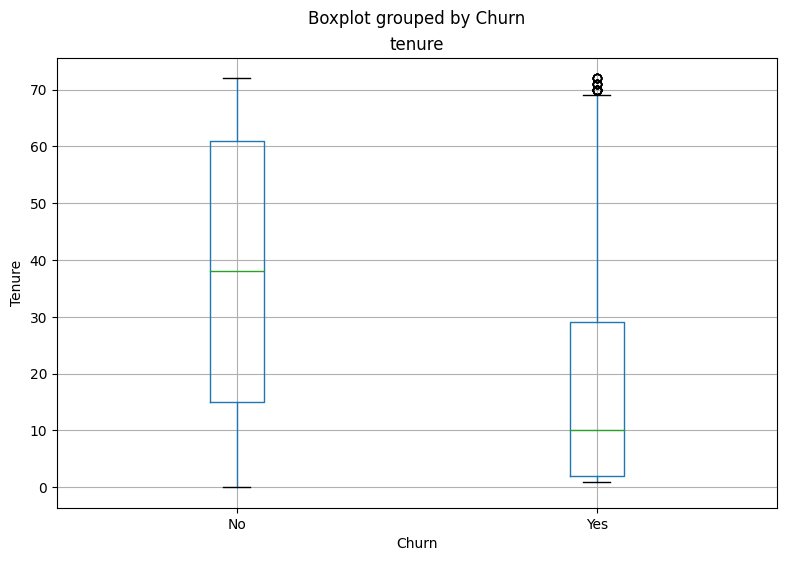

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'tenure', by = 'Churn', ax = ax)
ax.set_ylabel("Tenure")
plt.show()

## <b> Insights from our simple EDA: </b>
* ### We can see a difference between our target classes on tenure as you can see in the second boxplot, which is good because our model (Logistic Regression) may use this to separate the two classes.
* ### There is also a slight difference between our target classes on monthly charges as shown in the first boxplot.

### Before we start predicting, an important step to do is to convert our **Churn** feature, which is a string, into integer. *Yes* will be converted to 1 and *No* will be converted to 0. We will name this new columns a "class".

In [ ]:
df['class'] = df['Churn'].apply(lambda x : 1 if x == "Yes" else 0)
# features will be saved as X and our target will be saved as y
X = df[['tenure','MonthlyCharges']].copy()
y = df['class'].copy()

In [ ]:
df.shape

(7043, 22)

## <b> Splitting data into train and test

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [ ]:
y_train.value_counts()

0    4133
1    1501
Name: class, dtype: int64

In [ ]:
y_test.value_counts()

0    1041
1     368
Name: class, dtype: int64

## <b>Fitting logistic regression on train data

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
clf.coef_

array([[-0.05646728,  0.03315385]])

In [ ]:
# Get the model coefficients
clf.coef_

array([[-0.05646728,  0.03315385]])

In [ ]:
clf.intercept_

array([-1.77408975])

## <b>Evaluating the performance of the trained model

In [ ]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
X_test

,tenure,MonthlyCharges
2200,19,58.20
4627,60,116.60
3225,13,71.95
2828,1,20.45
3768,55,77.75
...,...,...
2631,7,99.25
5333,13,88.35
6972,56,111.95
4598,18,56.25


In [ ]:
test_preds

array([[0.7145149 , 0.2854851 ],
       [0.78522641, 0.21477359],
       [0.53064776, 0.46935224],
       ...,
       [0.77288679, 0.22711321],
       [0.71618111, 0.28381889],
       [0.57740038, 0.42259962]])

In [ ]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [ ]:
test_preds

array([0.2854851 , 0.21477359, 0.46935224, ..., 0.22711321, 0.28381889,
       0.42259962])

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
train_class_preds

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7857649982250621
The accuracy on test data is  0.7735982966643009


#<b> <u>Learning about the confusion matrix

x1  x2  x3  y   y^  y-    prob(y-)
350  8   6  1   1   340   0.78     Actual 1, Pred 1 - Truly Predicted Positive (1) TP - True Positive

250  4   10 0   0   230   0.45 Acutal 0, Pred 0 - Truly Predictive Negative (0) TN - True Negative

400  12  3  1   0   467   0.35 Actual 1, Pred 0 - Falsely Predicted Negative (0) FN - False Negative

230  15  2  0   1   435   0.89  Actual 0, Pred 1 - Falsely Predicted Positive (1) FP - False Positive

500  32  3  0   1   657   0.76 Actual 0, Pred 1 - Falsely Predicted Positive (1) FP - False Positive

420  56  2  1   0   756   0.32 Actual 1, Pred 0 - Falsely Predicted Negative (0) FN - False Negative

350  9   5  1   0   654   0.25 Actual 1, Pred 0 - Falsely Predicted Negative (0) FN - False Negative


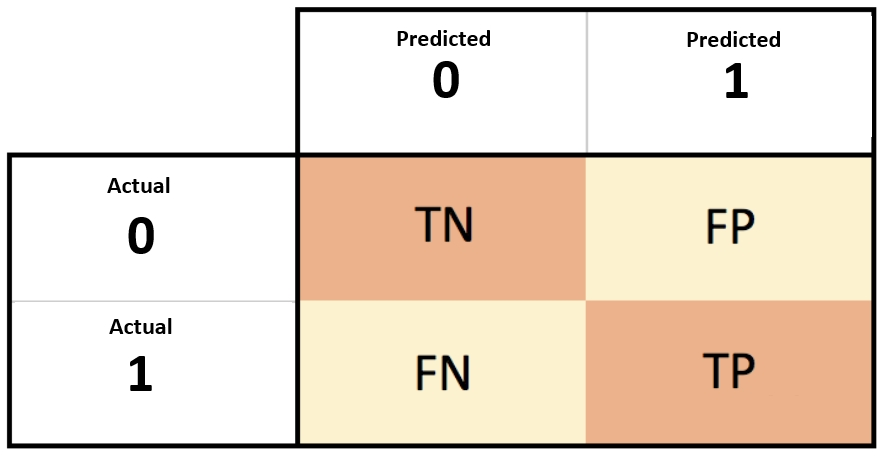

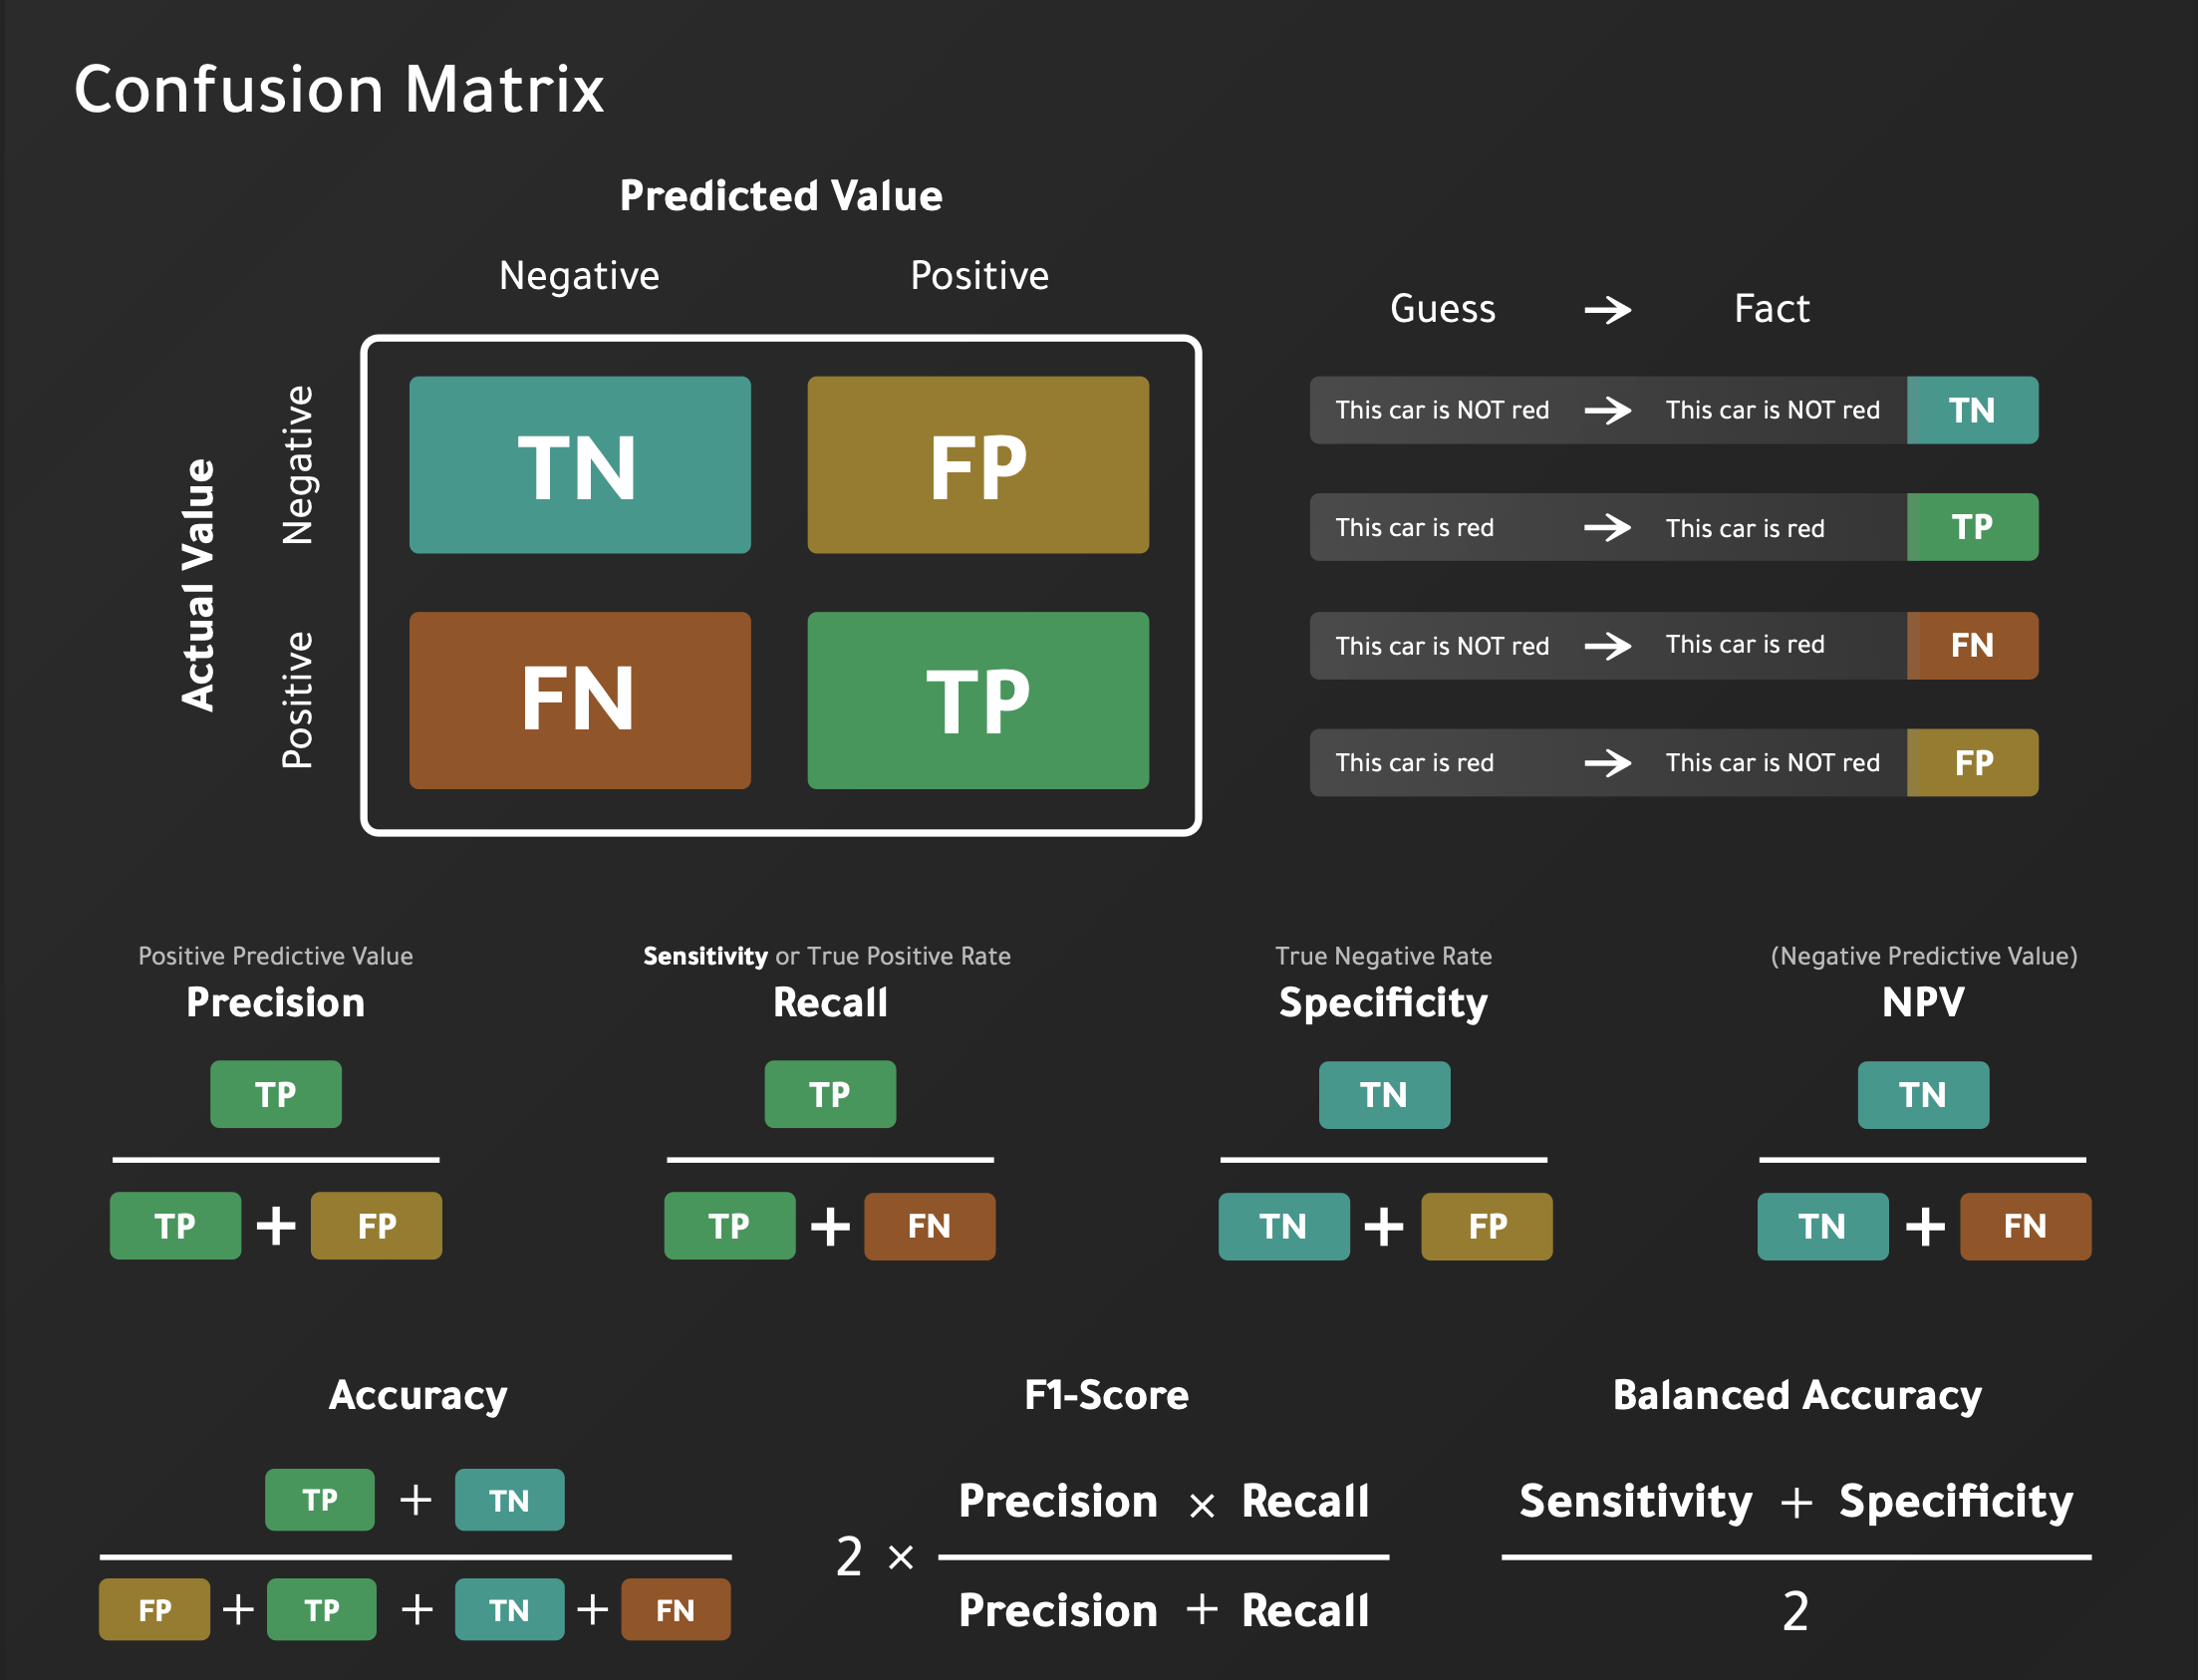

[[3745  388]
 [ 819  682]]


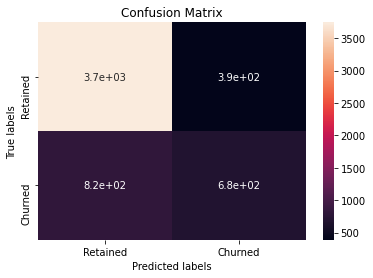

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[934 107]
 [212 156]]


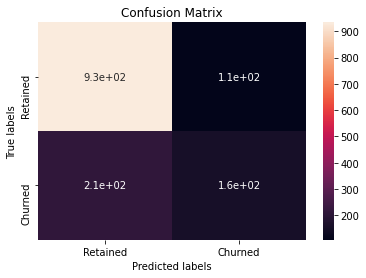

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## <b><u>Implementing Cross-validated Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [ ]:
logistic = LogisticRegression()

In [ ]:
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.785, test=0.789) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.787, test=0.791) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.788, test=0.771) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.789, test=0.775) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.781, test=0.806) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [ ]:
scores['train_accuracy']

array([0.78500111, 0.78677613, 0.78788551, 0.78877302, 0.78127773])

In [ ]:
scores['test_accuracy']

array([0.78881988, 0.79148181, 0.77107365, 0.77462289, 0.80639432])

In [ ]:
scores['estimator']

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

In [ ]:
for model in scores['estimator']:
    print(model.coef_)

[[-0.05617762  0.03293792]]
[[-0.05562275  0.03215852]]
[[-0.05820295  0.03454813]]
[[-0.05711808  0.03362381]]
[[-0.05530045  0.03257423]]


# <b><u> Evaluation metrics for classification models </u></b>

* #### <b><u>Accuracy</u></b> : Accuracy will require two inputs (i) actual class labels (ii)predicted class labels. To get the class labels from probabilities( these probabilities will be probabilities of getting a HIT), you can take a threshold of 0.5. Any probability above 0.5 will be labeled as class 1 and anything less than 0.5 will be labeled as class 0.


* #### <b><u>Precision</u></b> :  Precision for a label is defined as the number of true positives divided by the number of predicted positives. Report precision in percentages.

* #### <b><u>Recall</u></b> : Recall for a label is defined as the number of true positives divided by the total number of actual positives. Report recall in percentages.

* #### <b><u>F1-Score</u></b> : This is defined as the harmonic mean of precision and recall. 

* #### <b><u>Log Loss</u></b> : This is defined as \begin{align*}
  Log Loss &= \sum_{i=1}^{M} [ y^{i}log(P^{i}) + (1- y^{i})log(1 - P^{i} )]\\
\end{align*}

 Here M refers to the number of observations and $y^{i}$ = 1 or 0 depending upon the label for the $i^{th}$ observation and $P^{i}$ is the probability of class 1 or probability of getting a HIT.

* #### <b><u>AUC-ROC</u></b> - The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
